# Oscillatory motion



### Simple harmonic motion

We find the simplest example of oscillatory motion in a system consisting of a **particle of mass $m$** connected to a **massless string** to a rigid support, of **length $L$**. Let **$\theta$** be the angle between the string and the vertical and we suppose there is only one force acting on the system, the **gravity**. Thus, we have that the force perpendicular to the string (responsible of the motion) is

$$F_\theta = - m g \sin(\theta) \tag{1}$$

with $\bf{g}$ the acceleration due to gravity. 

Hence, using **Newton's second law** we get 

$$m \frac{d^2s}{dt^{2}} = - m g \sin(\theta)   \rightarrow \frac{d^2\theta}{dt^{2}} = - \frac{g}{L} \sin(\theta) \tag{2}  $$

where $s = L\theta $ is the displacement along a circular arc. 


It's useful to **transform** this second-order differential equation into a system of **two first-order differential equations**

$$\frac{d\omega}{dt} = - \frac{g}{L} \sin(\theta) \tag{3} $$

$$\frac{d\theta}{dt} = \omega \tag{4} $$

beeing $\bf{\omega}$ the **angular velocity**



So now, it's easy to solve this two first-order differential equation with any numerical differential equtions solver. Let's solve it using python

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import solve_ivp

In [37]:
# S is defined as [omega, theta]
def dSdt(t, S, L = 1):
    
    g = 9.81
    
    return [-g/L * np.sin(S[1]), S[0]]

In [38]:
t = np.linspace(0,10, 251) #Time
t_max = max(t)

In [39]:
#Initial conditions

w_0 = 0
theta_0 = 60 * np.pi / 180

S0 = [w_0, theta_0]

In [40]:
w, theta = solve_ivp(dSdt, t_span=(0, t_max), y0 = S0, t_eval = t).y

#### Plot

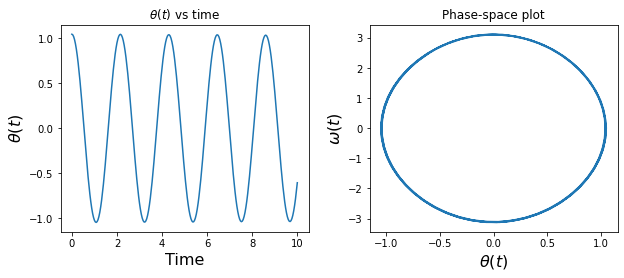

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (9,4))
fig.tight_layout(pad=3.0)


#Theta vs time
axes[0].plot(t, theta)
axes[0].set_xlabel('Time', fontsize = 16)
axes[0].set_ylabel(r'$\theta(t)$', fontsize=16)
axes[0].set_title(r'$\theta(t)$ vs time')

#Phase-space plot (omega vs theta)
axes[1].plot(theta, w)
axes[1].set_xlabel(r'$\theta(t)$', fontsize=16)
axes[1].set_ylabel('$\omega(t)$', fontsize=16)
axes[1].set_title('Phase-space plot')

plt.show()

Let's see the comparison between these results with the ones resulting from the **small angle approximation**, that leads to the well known solution

$$\theta(t) = \theta_0 \sin\left( \sqrt{\frac{g}{L}}t + \phi \right) \tag{5}$$

In [42]:
#Small angle approximation

g, L = 9.81, 1

theta_small = theta_0 * np.sin(np.sqrt(g/L)*t+ np.pi/2)  #We add a pi/2 phase to match both pendulum's initial conditions

In order to make an animation, it's convenient to transform $\theta$ into x and y coordinates

In [43]:
def theta_to_x_y(t, theta, theta_small, L):
    return (L*np.sin(theta),
            -L*np.cos(theta),
            L*np.sin(theta_small),
            -L*np.cos(theta_small))

x, y, x_small, y_small = theta_to_x_y(t, theta, theta_small, L)

Additionally, we'll plot the **difference between the angular positions** of the two pendulums (actually, the absolute value of the difference) and we'll see how it evolves with time, namely

$$\Delta\theta(t) = |\theta_{exact}(t) - \theta_{small}(t)| \tag{6} $$



In [44]:
delta_theta = np.abs(theta - theta_small)

In [45]:
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
# %matplotlib notebook

No handles with labels found to put in legend.


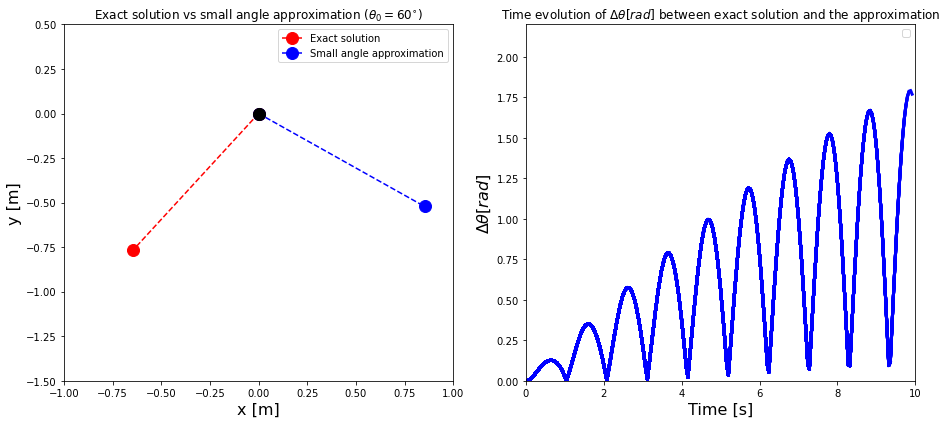

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(13,6))

ax[1].legend()

def animate(i):
    ax[0].clear()
     
    ax[0].plot([0,x[i]], [0, y[i]], 'ro--', markersize=12, label = 'Exact solution')
    ax[0].plot([0, x_small[i]], [0, y_small[i]], 'bo--', markersize = 12, label = 'Small angle approximation')
    ax[0].plot(0, 0, 'ko', markersize = 12.1)
    
    ax[0].set_xlim(-1, 1)
    ax[0].set_ylim(-1.5, 0.5)
    ax[0].set_xlabel('x [m]', fontsize=16)
    ax[0].set_ylabel('y [m]', fontsize=16)
    ax[0].set_title(r'Exact solution vs small angle approximation ($\theta_{0} = 60^{\circ})$')
    ax[0].legend()

    #ax.set_facecolor('white')
    

    ax[1].plot(t[:i], delta_theta[:i], 'b', lw = 3, label = r'$\Delta \theta [rad]$')
    ax[1].set_xlabel('Time [s]', fontsize=16)
    ax[1].set_ylabel(r'$\Delta \theta [rad]$', fontsize=16)
    ax[1].set_xlim(0, t_max)
    ax[1].set_ylim(0, 2.2)
    ax[1].set_title(r'Time evolution of $\Delta \theta [rad]$ between exact solution and the approximation')
    
    
    fig.tight_layout()
    
    
ani = animation.FuncAnimation(fig, animate, frames=250, interval=75)

ani.save('pendulum.gif',writer='pillow',fps=25)



So, for large angles ($60^{\circ}$) the small angle approximation is no longer valid and we have to use the exact solution, described by the equation of motion in [2]
